<a href="https://colab.research.google.com/github/heubanufi/Data-Collection-and-Analysis/blob/main/project202084020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **서울시 지하철 출퇴근 시간 승하차 인원 정보**

사용한 데이터
1. 서울시 지하철 호선별 역별 승하차 인원
2. 서울시 지하철 호선별 역별 시간대별 승하차 인원

**- 첫 번째 데이터: 서울시 지하철 호선별 역별 승하차 인원**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('서울시 지하철호선별 역별 승하차 인원 정보.csv', encoding='EUC-KR',
                 dtype={'사용일자':str, '호선명':str, '역명':str, '등록일자':str}, low_memory=False)

In [26]:
with open('서울시 지하철호선별 역별 승하차 인원 정보.csv', encoding='EUC-KR') as f:
  print(f.readline())
  print(f.readline())

"사용일자","호선명","역명","승차총승객수","하차총승객수","등록일자"

"20230511","우이신설선","4.19민주묘지","4992","4836","20230514"



In [27]:
df.rename(columns={'역명': '지하철역'},inplace=True)

In [28]:
import numpy as np

# 데이터프레임을 '호선명과 '지하철역' 열을 기준으로 그룹화
grouped_df = df.groupby(['호선명', '지하철역'])

# 각 그룹에서 '승차총승객수'와 '하차총승객수' 열의 평균을 계산
df_avg_in = grouped_df['승차총승객수'].mean()
df_avg_out = grouped_df['하차총승객수'].mean()

# 각 그룹에서 최대값과 최소값을 계산
df_max = grouped_df['하차총승객수'].max()
df_min = grouped_df['하차총승객수'].min()

# 결과 데이터프레임 생성
result = pd.DataFrame({
    '일 평균 승차 승객 수': df_avg_in,
    '일 평균 하차 승객 수': df_avg_out,
    '일 최대 하차 승객 수': df_max,
    '일 최소 하차 승객 수': df_min
})

# 결과 데이터프레임을 '호선명'과 '역명' 열을 기준으로 정렬
result.sort_index(inplace=True)

result.head(11)


일 평균 승차 승객 수  일 평균 하차 승객 수  일 최대 하차 승객 수  일 최소 하차 승객 수
호선명 지하철역                                                                
1호선 동대문              11818.500     11595.325         13801          8674
    동묘앞              10012.925     10353.600         17110          5570
    서울역              51400.775     48921.775         62865         33892
    시청               24549.950     24664.850         31188         10758
    신설동              13441.300     12983.875         15494          7204
    제기동              16913.100     17251.250         20143         10501
    종각               35352.325     34557.925         44058         12846
    종로3가             26126.275     23750.425         29010         14739
    종로5가             24275.800     23888.000         28323         11875
    청량리(서울시립대입구)     20024.100     19838.400         23098         13043
2호선 강남               74182.650     71819.575         94078         31989

--------------------------------------------------------

**- 두 번째 데이터: 서울시 지하철 호선별 역별 시간대별 승하차 인원**

In [29]:
import pandas as pd
df2 = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='EUC-KR',
                 dtype={'호선명':str, '지하철역':str}, low_memory=False)

In [30]:
with open('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='EUC-KR') as f:
  print(f.readline())
  print(f.readline())

"사용월","호선명","지하철역","04시-05시 승차인원","04시-05시 하차인원","05시-06시 승차인원","05시-06시 하차인원","06시-07시 승차인원","06시-07시 하차인원","07시-08시 승차인원","07시-08시 하차인원","08시-09시 승차인원","08시-09시 하차인원","09시-10시 승차인원","09시-10시 하차인원","10시-11시 승차인원","10시-11시 하차인원","11시-12시 승차인원","11시-12시 하차인원","12시-13시 승차인원","12시-13시 하차인원","13시-14시 승차인원","13시-14시 하차인원","14시-15시 승차인원","14시-15시 하차인원","15시-16시 승차인원","15시-16시 하차인원","16시-17시 승차인원","16시-17시 하차인원","17시-18시 승차인원","17시-18시 하차인원","18시-19시 승차인원","18시-19시 하차인원","19시-20시 승차인원","19시-20시 하차인원","20시-21시 승차인원","20시-21시 하차인원","21시-22시 승차인원","21시-22시 하차인원","22시-23시 승차인원","22시-23시 하차인원","23시-24시 승차인원","23시-24시 하차인원","00시-01시 승차인원","00시-01시 하차인원","01시-02시 승차인원","01시-02시 하차인원","02시-03시 승차인원","02시-03시 하차인원","03시-04시 승차인원","03시-04시 하차인원","작업일자"

"202304","1호선","동대문","749","13","10603","2210","9478","6645","14847","12784","19769","21580","18869","23520","17768","24579","19118","27129","23034","26700","24562","24210","25996","23672","27391","22025","27372","21567","26703","21294","24733","21351",

In [31]:
df2.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202304,1호선,동대문,749,13,10603,2210,9478,6645,14847,...,8762,524,2480,1,186,0,0,0,0,20230503
1,202304,1호선,동묘앞,204,3,2738,993,3544,4933,7427,...,3998,89,1634,2,295,0,0,0,0,20230503
2,202304,1호선,서울역,673,28,7682,8982,13316,56520,42256,...,13801,2424,2423,0,179,0,0,0,0,20230503
3,202304,1호선,시청,135,5,2141,4360,3966,24036,7878,...,4147,345,923,0,14,0,0,0,0,20230503
4,202304,1호선,신설동,409,5,8266,2287,9839,8406,21340,...,9184,395,1967,0,0,1,1,0,0,20230503


In [32]:
df2_time = df2.loc[:, '호선명':'03시-04시 하차인원']

**출근시간 승하차, 퇴근시간 승하차 인원 데이터 정리**

In [33]:
df2_time['01시-04시 승차인원'] = df2_time['01시-02시 승차인원'] + df2_time['02시-03시 승차인원'] + df2_time['03시-04시 승차인원']
df2_time = df2_time.drop(['01시-02시 승차인원', '02시-03시 승차인원', '03시-04시 승차인원'], axis=1)
df2_time['01시-04시 하차인원'] = df2_time['01시-02시 하차인원'] + df2_time['02시-03시 하차인원'] + df2_time['03시-04시 하차인원']
df2_time = df2_time.drop(['01시-02시 하차인원', '02시-03시 하차인원', '03시-04시 하차인원'], axis=1)


In [34]:
#아침(출근시간) 승차
df2_time['04시-10시 승차인원'] = df2_time[['01시-04시 승차인원', '04시-05시 승차인원', '05시-06시 승차인원', '06시-07시 승차인원',
                              '07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원']].sum(axis=1)
df2_time = df2_time.drop(['01시-04시 승차인원', '04시-05시 승차인원', '05시-06시 승차인원', '06시-07시 승차인원', '07시-08시 승차인원',
                '08시-09시 승차인원', '09시-10시 승차인원'], axis=1)
#아침(출근시간) 하차
df2_time['04시-10시 하차인원'] = df2_time[['01시-04시 하차인원', '04시-05시 하차인원', '05시-06시 하차인원', '06시-07시 하차인원',
                              '07시-08시 하차인원', '08시-09시 하차인원', '09시-10시 하차인원']].sum(axis=1)
df2_time = df2_time.drop(['01시-04시 하차인원', '04시-05시 하차인원', '05시-06시 하차인원', '06시-07시 하차인원', '07시-08시 하차인원',
                '08시-09시 하차인원', '09시-10시 하차인원'], axis=1)

In [35]:
#저녁(퇴근시간) 승차
df2_time['17시-25시 승차인원'] = df2_time['17시-18시 승차인원'] + df2_time['18시-19시 승차인원'] + df2_time['19시-20시 승차인원'] + df2_time['20시-21시 승차인원']
+ df2_time['21시-22시 승차인원'] + df2_time['22시-23시 승차인원'] + df2_time['23시-24시 승차인원'] + df2_time['00시-01시 승차인원']
df2_time = df2_time.drop(['17시-18시 승차인원', '18시-19시 승차인원', '19시-20시 승차인원', '20시-21시 승차인원', '21시-22시 승차인원',
                '22시-23시 승차인원', '23시-24시 승차인원', '00시-01시 승차인원'], axis=1)

#저녁(퇴근시간) 하차
df2_time['17시-25시 하차인원'] = df2_time['17시-18시 하차인원'] + df2_time['18시-19시 하차인원'] + df2_time['19시-20시 하차인원'] + df2_time['20시-21시 하차인원']
+ df2_time['21시-22시 하차인원'] + df2_time['22시-23시 하차인원'] + df2_time['23시-24시 하차인원'] + df2_time['00시-01시 하차인원']
df2_time = df2_time.drop(['17시-18시 하차인원', '18시-19시 하차인원', '19시-20시 하차인원', '20시-21시 하차인원', '21시-22시 하차인원',
                '22시-23시 하차인원', '23시-24시 하차인원', '00시-01시 하차인원'], axis=1)

df2_time.head()

,호선명,지하철역,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,04시-10시 승차인원,04시-10시 하차인원,17시-25시 승차인원,17시-25시 하차인원
0,1호선,동대문,17768,24579,19118,27129,23034,26700,24562,24210,25996,23672,27391,22025,27372,21567,74316,66938,85000,77611
1,1호선,동묘앞,11830,23482,16499,30405,23018,32340,30655,37040,33092,31652,35380,27870,36258,20652,35629,56851,76957,41644
2,1호선,서울역,63776,78084,75338,69965,89059,80142,87807,79108,70323,70863,98818,77215,112363,78640,197492,556707,585502,301463
3,1호선,시청,16330,43643,22222,43380,23395,40340,28701,40882,37083,32890,49243,28982,60780,28676,37892,383430,372869,78439
4,1호선,신설동,18156,21784,20184,19037,21613,18674,23549,19543,22987,18317,24457,20006,29002,20992,92090,122677,126088,91562


**데이터 계산**

In [36]:
import numpy as np

# 데이터프레임을 '호선명과 '지하철역' 열을 기준으로 그룹화
grouped_df2 = df2_time.groupby(['호선명', '지하철역'])

# 각 그룹에서 '승차총승객수'와 '하차총승객수' 열의 평균을 계산
df2_avg_in_mor = grouped_df2['04시-10시 승차인원'].mean()
df2_avg_out_mor = grouped_df2['04시-10시 하차인원'].mean()
df2_avg_in_nig = grouped_df2['17시-25시 승차인원'].mean()
df2_avg_out_nig = grouped_df2['17시-25시 하차인원'].mean()

# 각 그룹에서 '승차인원'와 '하차인원' 열의 최대값 최소값 계산
df2_max_in_mor = grouped_df2['04시-10시 승차인원'].max()
df2_max_out_mor = grouped_df2['04시-10시 하차인원'].max()
df2_max_in_nig = grouped_df2['17시-25시 승차인원'].max()
df2_max_out_nig = grouped_df2['17시-25시 하차인원'].max()

df2_min_in_mor = grouped_df2['04시-10시 승차인원'].min()
df2_min_out_mor = grouped_df2['04시-10시 하차인원'].min()
df2_min_in_nig = grouped_df2['17시-25시 승차인원'].min()
df2_min_out_nig = grouped_df2['17시-25시 하차인원'].min()


# 결과 데이터프레임 생성
result2 = pd.DataFrame({
    '출근시간(04시-10시) 평균 승차 승객 수': round(df2_avg_in_mor,2),
    '출근시간(04시-10시) 평균 하차 승객 수': round(df2_avg_out_mor,2),
    '퇴근시간(17시-25시) 평균 승차 승객 수': round(df2_avg_in_nig,2),
    '퇴근시간(17시-25시) 평균 하차 승객 수': round(df2_avg_out_nig,2)
})

# 결과 데이터프레임을 '호선명'과 '지하철역' 열을 기준으로 정렬
result2.sort_index(inplace=True)

result2.head(11)


출근시간(04시-10시) 평균 승차 승객 수  출근시간(04시-10시) 평균 하차 승객 수  \
호선명 지하철역                                                               
1호선 동대문                           85503.09                  80192.12   
    동묘앞                           31091.98                  58974.87   
    서울역                          197383.20                 504869.23   
    시청                            33417.11                 348041.56   
    신설동                           86738.07                 144954.98   
    제기동                           91751.71                 113150.58   
    종각                            41904.90                 524530.98   
    종로3가                          39905.67                 210111.17   
    종로5가                          32236.43                 245981.32   
    청량리(서울시립대입구)                 160587.25                 115364.82   
    청량리(지하)                      204737.43                 141979.90   

                  퇴근시간(17시-25시) 평균 승차 승객 수  퇴근시간(17시-25시) 평균 하차 승객 수  
호선명 지하철역                                                              
1호선 동대문                           99948.91                 102885.77  
    동묘앞                           79321.07                  41594.80  
    서울역                          564558.22                 303584.78  
    시청                           335174.29                  76860.98  
    신설동                          147805.91                  91727.69  
    제기동                          129851.16                  90463.47  
    종각                           550086.09                 185320.17  
    종로3가                         343515.25                 144506.34  
    종로5가                         294084.71                  99481.39  
    청량리(서울시립대입구)                 160652.20                 172204.90  
    청량리(지하)                      232264.48                 240796.43

**데이터 프레임에서 추출한 값을 '호선명'과 '지하철역'을 merge**

In [37]:
seoul_sub = pd.merge(result, result2, on=['호선명', '지하철역'])
seoul_sub.head(30)

일 평균 승차 승객 수  일 평균 하차 승객 수  일 최대 하차 승객 수  일 최소 하차 승객 수  \
호선명 지하철역                                                                     
1호선 동대문                11818.500     11595.325         13801          8674   
    동묘앞                10012.925     10353.600         17110          5570   
    서울역                51400.775     48921.775         62865         33892   
    시청                 24549.950     24664.850         31188         10758   
    신설동                13441.300     12983.875         15494          7204   
    제기동                16913.100     17251.250         20143         10501   
    종각                 35352.325     34557.925         44058         12846   
    종로3가               26126.275     23750.425         29010         14739   
    종로5가               24275.800     23888.000         28323         11875   
    청량리(서울시립대입구)       20024.100     19838.400         23098         13043   
2호선 강남                 74182.650     71819.575         94078         31989   
    강변(동서울터미널)         31126.500     29553.750         40605         22994   
    건대입구               37102.350     38877.175         48288         27168   
    교대(법원.검찰청)         29367.775     34866.650         45395         12611   
    구로디지털단지            54513.075     53808.550         66540         25674   
    구의(광진구청)           22868.300     22324.775         26922         12463   
    낙성대(강감찬)           27156.825     26352.875         30884         14303   
    당산                 18137.150     20960.425         26077          9009   
    대림(구로구청)           24141.150     24670.000         28488         14840   
    도림천                 1189.550      1267.325          1659           512   
    동대문역사문화공원(DDP)     14214.150     16383.500         19394         12921   
    뚝섬                 22752.925     23706.825         29856         11146   
    문래                 20199.700     20847.250         26473          8478   
    방배                 17665.750     18277.775         23657          7025   
    봉천                 23218.525     21634.550         25451         11897   
    사당                 38340.800     42339.650         52337         23682   
    삼성(무역센터)           51522.175     51961.025         67360         24493   
    상왕십리               13867.250     13317.000         16000          7410   
    서울대입구(관악구청)        46096.550     44665.900         53009         25792   
    서초                 21016.825     19880.300         26515          5496   

                    출근시간(04시-10시) 평균 승차 승객 수  출근시간(04시-10시) 평균 하차 승객 수  \
호선명 지하철역                                                                 
1호선 동대문                             85503.09                  80192.12   
    동묘앞                             31091.98                  58974.87   
    서울역                            197383.20                 504869.23   
    시청                              33417.11                 348041.56   
    신설동                             86738.07                 144954.98   
    제기동                             91751.71                 113150.58   
    종각                              41904.90                 524530.98   
    종로3가                            39905.67                 210111.17   
    종로5가                            32236.43                 245981.32   
    청량리(서울시립대입구)                   160587.25                 115364.82   
2호선 강남                             212264.14                 903251.55   
    강변(동서울터미널)                     341192.04                 162992.59   
    건대입구                           275710.22                 170018.98   
    교대(법원.검찰청)                     111716.14                 391150.22   
    구로디지털단지                        551341.25                 518791.40   
    구의(광진구청)                       284353.56                  93522.68   
    낙성대(강감찬)                       300123.29                  93661.97   
    당산                             178385.56                 173590.33   
    대림(구로구청)                       307085.2

(1) 출근시간 평균 승차 승객 수를 기준으로 내림차순 정렬

In [ ]:
seoul_sub_sorted1 = seoul_sub.sort_values(by='출근시간(04시-10시) 평균 승차 승객 수', ascending=False)
seoulSubwayTop1 = seoul_sub_sorted1.groupby('호선명').head()

seoulSubwayTop1.head(20)

(2) 출근시간 평균 하차 승객 수를 기준으로 내림차순 정렬

In [ ]:
seoul_sub_sorted2 = seoul_sub.sort_values(by='출근시간(04시-10시) 평균 하차 승객 수', ascending=False)
seoulSubwayTop2 = seoul_sub_sorted2.groupby('호선명').head()

seoulSubwayTop2.head(20)

(3) 퇴근시간 평균 하차 승객 수를 기준으로 내림차순 정렬

In [ ]:
seoul_sub_sorted3 = seoul_sub.sort_values(by='퇴근시간(17시-25시) 평균 승차 승객 수', ascending=False)
seoulSubwayTop3 = seoul_sub_sorted3.groupby('호선명').head()

seoulSubwayTop3.head(20)

(4) 퇴근시간 평균 하차 승객 수를 기준으로 내림차순 정렬

In [ ]:
seoul_sub_sorted4 = seoul_sub.sort_values(by='퇴근시간(17시-25시) 평균 하차 승객 수', ascending=False)
seoulSubwayTop4 = seoul_sub_sorted3.groupby('호선명').head()

seoulSubwayTop4.head(20)

**일 평균 승차 승객 수가 높은 수부터 내림차순 정렬**

In [39]:
seoul_sub_sorted = seoul_sub.sort_values(by='일 평균 승차 승객 수', ascending=False)
seoulSubwayTop = seoul_sub_sorted.groupby('호선명').head()

seoulSubwayTop.head(50)

일 평균 승차 승객 수  일 평균 하차 승객 수  일 최대 하차 승객 수  일 최소 하차 승객 수  \
호선명 지하철역                                                                   
2호선 잠실(송파구청)         76809.600     75665.925         94763         51249   
    강남               74182.650     71819.575         94078         31989   
    홍대입구             67271.875     71483.200         93713         54487   
    신림               55240.950     53232.525         62233         34305   
    구로디지털단지          54513.075     53808.550         66540         25674   
1호선 서울역              51400.775     48921.775         62865         33892   
3호선 고속터미널            48667.875     46440.800         63871         36213   
경부선 영등포              41730.825     42660.150         50335         34640   
    용산               40797.025     41198.600         51042         35443   
    수원               40075.875     42153.375         50937         35922   
7호선 가산디지털단지          38092.150     38086.875         52833         10926   
4호선 혜화               35655.925     35849.600         44359         25271   
1호선 종각               35352.325     34557.925         44058         12846   
3호선 양재(서초구청)         34402.375     37576.925         47736         13584   
    연신내              34338.575     32559.675         38609         19774   
4호선 수유(강북구청)         33845.650     33902.600         40287         20825   
경인선 부천               32502.625     32533.975         38296         22164   
4호선 명동               31120.825     33418.650         39619         24039   
5호선 광화문(세종문화회관)      30129.200     31905.675         40837         13285   
3호선 압구정              30087.250     32513.700         41540         15767   
9호선 신논현              29218.750     28623.000         37334         16013   
경인선 부평               29065.350     30942.375         37238         22886   
중앙선 회기               28508.575     27458.050         32740         15731   
4호선 충무로              28396.175     29264.525         37744         11424   
    쌍문               28298.225     26237.100         30980         14588   
경인선 역곡               28283.675     27897.775         33681         14995   
3호선 남부터미널(예술의전당)     28058.800     28512.925         37655         16275   
5호선 화곡               27974.850     26063.850         30923         14127   
    까치산              27820.825     26640.075         31230         15229   
경부선 금정               27447.125     27792.750         33598         15090   
경인선 송내               26352.750     26068.950         31824         13229   
과천선 범계               26199.625     26335.225         33338         15379   
1호선 종로3가             26126.275     23750.425         29010         14739   
9호선 여의도              25680.875     24823.125         33299          9177   
5호선 여의도              25663.375     27042.825         36611          8983   
경부선 안양               25627.375     25570.825         31394         14126   
9호선 노량진              25359.725     24685.925         28985         16002   
분당선 야탑               25007.025     26433.100         33450         14899   
1호선 시청               24549.950     24664.850         31188         10758   
    종로5가             24275.800     23888.000         28323         11875   
과천선 인덕원              24160.850     24518.975         30092         12234   
분당선 서현               23537.750     23828.000         31043         14145   
경인선 개봉               21836.900     21211.375         25101         12235   
7호선 학동               21109.150     22382.225         29414          7055   
9호선 가양               20948.650     20246.875         24112         10577   
5호선 오목교(목동운동장앞)      20660.500     21938.475         26796         12151   
분당선 모란               20621.875     21091.700         31786         12007   
7호선 철산               20482.750     20665.475         26583         10893   
    광명사거리            20392.550     20069.250         23762         12114   
    노원               19536.175     20657.150         25756         11872   

                  출근시간(04시-10시) 평균 승차 승객 수  출근시간(04시-10시) 평균 하차 승

** 1차 과제 때 index를 false로 저장하여 호선명과 지하철역이 누락된 것을 true로 바꾸어 다시 저장하여 줍니다.**

In [40]:
seoulSubwayTop.to_csv('seoulSubwayTop.csv', index=True)
SST = pd.read_csv('seoulSubwayTop.csv')
print(SST)

     호선명      지하철역  일 평균 승차 승객 수  일 평균 하차 승객 수  일 최대 하차 승객 수  일 최소 하차 승객 수  \
0    2호선  잠실(송파구청)     76809.600     75665.925         94763         51249   
1    2호선        강남     74182.650     71819.575         94078         31989   
2    2호선      홍대입구     67271.875     71483.200         93713         54487   
3    2호선        신림     55240.950     53232.525         62233         34305   
4    2호선   구로디지털단지     54513.075     53808.550         66540         25674   
..   ...       ...           ...           ...           ...           ...   
125  장항선  쌍용(나사렛대)      2987.175      2870.325          3753          1363   
126  장항선  신창(순천향대)      2862.925      2796.750          4375          1005   
127  경강선        여주      2848.425      2837.500          3673          2282   
128  경강선        이천      2833.100      3016.175          3891          2297   
129  장항선        탕정      1424.800      1295.075          1673           705   

     출근시간(04시-10시) 평균 승차 승객 수  출근시간(04시-10시) 평균 하차 승객 수  \
0   

**시각화를 위해 데이터 수를 상위 50개에서 20개로 줄이기**

In [41]:
top_20 = seoulSubwayTop.head(20)
top_20.to_csv('seoul_subway_top_20.csv', index=True)

In [42]:
df3 = pd.read_csv('seoul_subway_top_20.csv')
print(df3)

    호선명         지하철역  일 평균 승차 승객 수  일 평균 하차 승객 수  일 최대 하차 승객 수  일 최소 하차 승객 수  \
0   2호선     잠실(송파구청)     76809.600     75665.925         94763         51249   
1   2호선           강남     74182.650     71819.575         94078         31989   
2   2호선         홍대입구     67271.875     71483.200         93713         54487   
3   2호선           신림     55240.950     53232.525         62233         34305   
4   2호선      구로디지털단지     54513.075     53808.550         66540         25674   
5   1호선          서울역     51400.775     48921.775         62865         33892   
6   3호선        고속터미널     48667.875     46440.800         63871         36213   
7   경부선          영등포     41730.825     42660.150         50335         34640   
8   경부선           용산     40797.025     41198.600         51042         35443   
9   경부선           수원     40075.875     42153.375         50937         35922   
10  7호선      가산디지털단지     38092.150     38086.875         52833         10926   
11  4호선           혜화     35655.925     3

# **막대 그래프를 이용한 시각화**

폰트 설치

In [ ]:
!pip install -q matplotlib
!sudo apt-get install -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설치 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 등록
font = fm.FontProperties(fname=fontpath, size=12)
plt.rc('font', family='NanumBarunGothic')


In [44]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [45]:
print(df3.columns)

Index(['호선명', '지하철역', '일 평균 승차 승객 수', '일 평균 하차 승객 수', '일 최대 하차 승객 수',
       '일 최소 하차 승객 수', '출근시간(04시-10시) 평균 승차 승객 수', '출근시간(04시-10시) 평균 하차 승객 수',
       '퇴근시간(17시-25시) 평균 승차 승객 수', '퇴근시간(17시-25시) 평균 하차 승객 수'],
      dtype='object')


**서울 지하철 일평균 승하차 Top20**

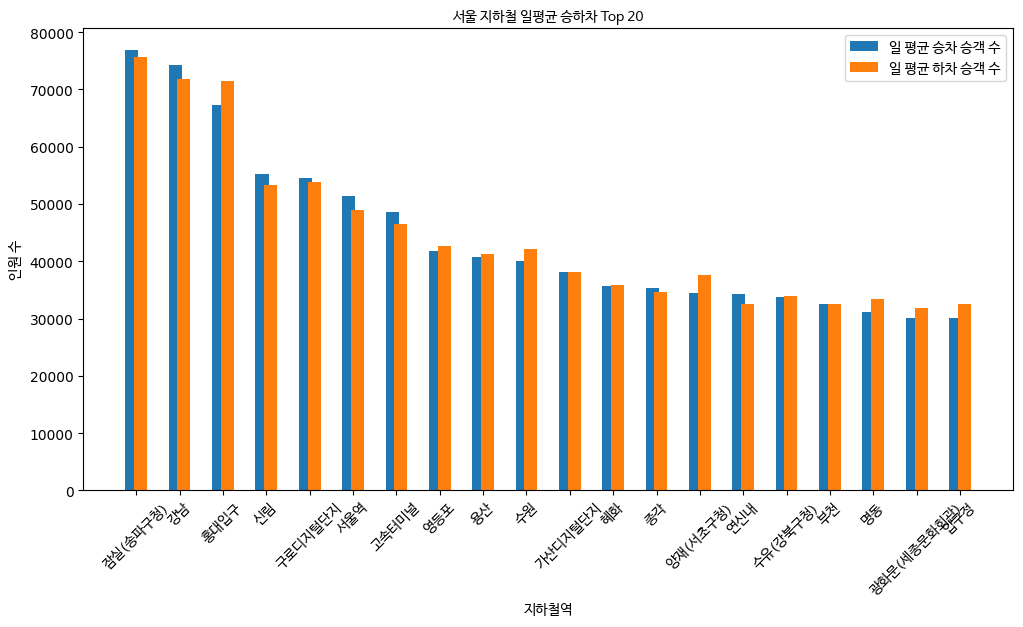

In [46]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 로드
font_prop = fm.FontProperties(fname=font_path)

# 막대의 위치 계산
bar_width = 0.3
x = df3['지하철역'].tolist()
x_pos = np.arange(len(x))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x_pos - 0.1, df3['일 평균 승차 승객 수'], label='일 평균 승차 승객 수', width=bar_width)
plt.bar(x_pos + 0.1, df3['일 평균 하차 승객 수'], label='일 평균 하차 승객 수', width=bar_width)

plt.xlabel('지하철역', fontproperties=font_prop)  # x축 한글 폰트 적용
plt.ylabel('인원 수', fontproperties=font_prop)  # y축 한글 폰트 적용
plt.title('서울 지하철 일평균 승하차 Top 20', fontproperties=font_prop)  # 제목 한글 폰트 적용
plt.legend(prop=font_prop)
plt.xticks(x_pos, x, rotation=45, fontproperties=font_prop)  # x축 라벨 회전 및 한글 폰트 적용
plt.show()


일평균 승차 승객 수 1위 잠실 2위 강남 3위 홍대
일평균 하차 승객 수 1위 잠실 2위 홍대입구 3위 강남

모두 1위인 잠실은 승차인원이 더 많고, 강남은 승차, 홍대입구는 하차 인원이 더 많은 것을 확인할 수 있다.

**서울 지하철 출근시간 승하차**

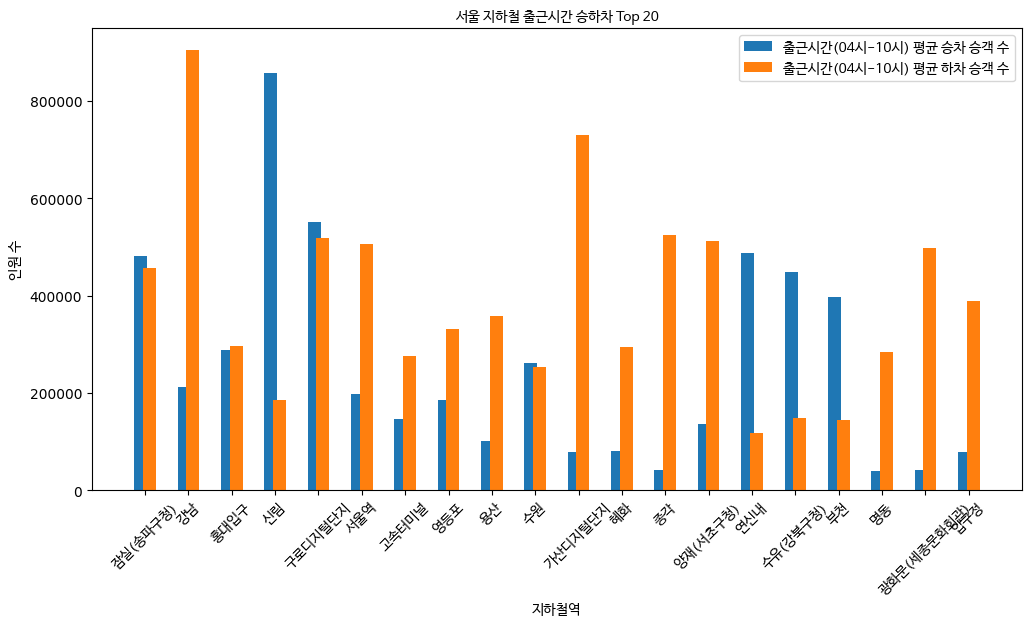

In [49]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 로드
font_prop = fm.FontProperties(fname=font_path)

# 막대의 위치 계산
bar_width = 0.3
x = df3['지하철역'].tolist()
x_pos = np.arange(len(x))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x_pos - 0.1, df3['출근시간(04시-10시) 평균 승차 승객 수'], label='출근시간(04시-10시) 평균 승차 승객 수', width=bar_width)
plt.bar(x_pos + 0.1, df3['출근시간(04시-10시) 평균 하차 승객 수'], label='출근시간(04시-10시) 평균 하차 승객 수', width=bar_width)

plt.xlabel('지하철역', fontproperties=font_prop)  # x축 한글 폰트 적용
plt.ylabel('인원 수', fontproperties=font_prop)  # y축 한글 폰트 적용
plt.title('서울 지하철 출근시간 승하차 Top 20', fontproperties=font_prop)  # 제목 한글 폰트 적용
plt.legend(prop=font_prop)
plt.xticks(x_pos, x, rotation=45, fontproperties=font_prop)  # x축 라벨 회전 및 한글 폰트 적용
plt.show()


출근시간 승차 승객 수 1위 신림, 2위 구로디지털단지, 3위 연신내 그리고 잠실 수유 부천

출근시간 하차 승객 수 1위 강남, 2위 가산디지털단지, 3위 양재 그리고 구로디지털단지 등

**서울 지하철 퇴근시간 승하차**

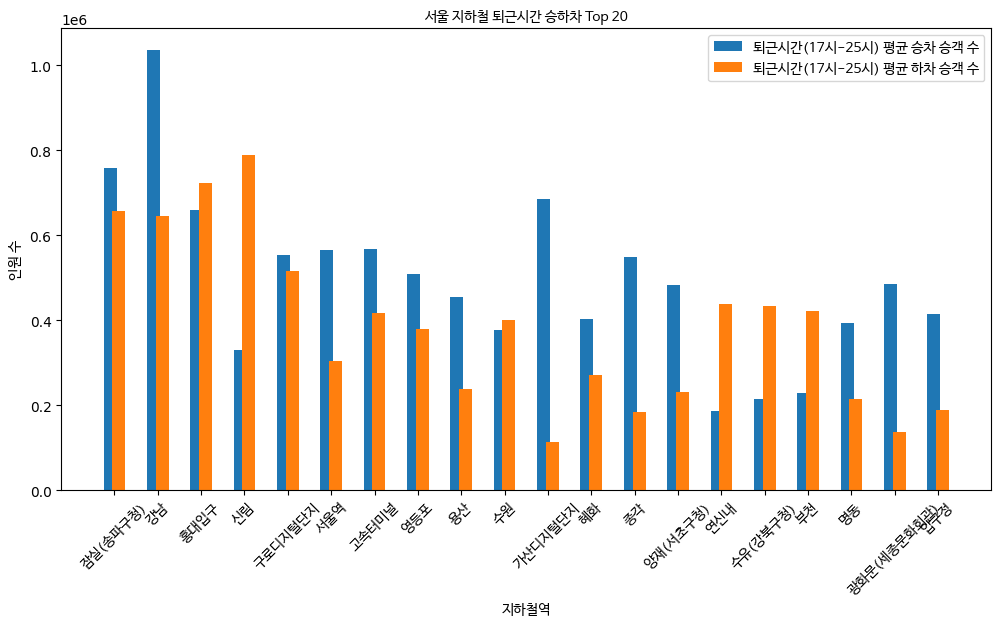

In [48]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 로드
font_prop = fm.FontProperties(fname=font_path)

# 막대의 위치 계산
bar_width = 0.3
x = df3['지하철역'].tolist()
x_pos = np.arange(len(x))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x_pos - 0.1, df3['퇴근시간(17시-25시) 평균 승차 승객 수'], label='퇴근시간(17시-25시) 평균 승차 승객 수', width=bar_width)
plt.bar(x_pos + 0.1, df3['퇴근시간(17시-25시) 평균 하차 승객 수'], label='퇴근시간(17시-25시) 평균 하차 승객 수', width=bar_width)

plt.xlabel('지하철역', fontproperties=font_prop)  # x축 한글 폰트 적용
plt.ylabel('인원 수', fontproperties=font_prop)  # y축 한글 폰트 적용
plt.title('서울 지하철 퇴근시간 승하차 Top 20', fontproperties=font_prop)  # 제목 한글 폰트 적용
plt.legend(prop=font_prop)
plt.xticks(x_pos, x, rotation=45, fontproperties=font_prop)  # x축 라벨 회전 및 한글 폰트 적용
plt.show()


퇴근시간 승차 승객 수 1위 강남, 2위 가산디지털단지, 3위 잠실 그리고 홍대입구이고 신림과 연신내 수유 부천이 출근시간과 다르게 낮은 그래프를 보이고 있다.

퇴근시간 하차 승객 수 1위 신림, 2위 잠실, 3위 홍대입구 그리고 구로디지털단지 등이 있고 퇴근시간 승차 승객 수 상위를 차지했던 가산디지털단지를 포함하여 명동 광화문 압구정 종각은 매우 낮은 그래프 높이를 보이고 있다.

**서울 출퇴근시간 승차**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 로드
font_prop = fm.FontProperties(fname=font_path)

# 막대의 위치 계산
bar_width = 0.3
x = df3['지하철역'].tolist()
x_pos = np.arange(len(x))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x_pos - 0.1, df3['출근시간(04시-10시) 평균 승차 승객 수'], label='출근시간(04시-10시) 평균 승차 승객 수', width=bar_width)
plt.bar(x_pos + 0.1, df3['퇴근시간(17시-25시) 평균 승차 승객 수'], label='퇴근시간(17시-25시) 평균 승차 승객 수', width=bar_width)

plt.xlabel('지하철역', fontproperties=font_prop)  # x축 한글 폰트 적용
plt.ylabel('인원 수', fontproperties=font_prop)  # y축 한글 폰트 적용
plt.title('서울 지하철 출근,퇴근시간 승차 Top 20', fontproperties=font_prop)  # 제목 한글 폰트 적용
plt.legend(prop=font_prop)
plt.xticks(x_pos, x, rotation=45, fontproperties=font_prop)  # x축 라벨 회전 및 한글 폰트 적용
plt.show()


**서울 지하철 출퇴근 하차 승객 수**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 나눔 폰트 로드
font_prop = fm.FontProperties(fname=font_path)

# 막대의 위치 계산
bar_width = 0.3
x = df3['지하철역'].tolist()
x_pos = np.arange(len(x))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x_pos - 0.1, df3['출근시간(04시-10시) 평균 하차 승객 수'], label='출근시간(04시-10시) 평균 하차 승객 수', width=bar_width)
plt.bar(x_pos + 0.1, df3['퇴근시간(17시-25시) 평균 하차 승객 수'], label='퇴근시간(17시-25시) 평균 하차 승객 수', width=bar_width)

plt.xlabel('지하철역', fontproperties=font_prop)  # x축 한글 폰트 적용
plt.ylabel('인원 수', fontproperties=font_prop)  # y축 한글 폰트 적용
plt.title('서울 지하철 출근,퇴근시간 하차 Top 20', fontproperties=font_prop)  # 제목 한글 폰트 적용
plt.legend(prop=font_prop)
plt.xticks(x_pos, x, rotation=45, fontproperties=font_prop)  # x축 라벨 회전 및 한글 폰트 적용
plt.show()


# **시사점**

**분석 결과**

일평균 승차 승객 수 1위 잠실 2위 강남 3위 홍대
일평균 하차 승객 수 1위 잠실 2위 홍대입구 3위 강남

- 모두 1위인 잠실은 승차인원이 더 많고, 강남은 승차, 홍대입구는 하차 인원이 더 많은 것을 확인할 수 있다.

**출근시간 승차 승객 수** 1위 신림, 2위 구로디지털단지, 3위 연신내 그리고 잠실 수유 부천이며,
**출근시간 하차 승객 수** 1위 강남, 2위 가산디지털단지, 3위 양재 그리고 구로디지털단지 등이 있다.


.
1. 일평균 승차 승객 수를 기준으로 20개를 선정했을 때 상위권에 위치한 3개의 역은 2호선이라는 공통점을 가지고 있다.

2. 강남, 서울역, 가산디지털단지, 광화문, 압구정은 출근시간 하차 승객 수가 많고 퇴근시간 승차 승객 수가 많다. 해당 지하철역에서 가까운 곳에 근무지가 있을 것으로 보인다.

3. 잠실, 홍대입구, 구로디지털단지, 수원은 승차 하차의 폭이 좁다. 해당 역들은 경기도이거나 서울과 경기도를 운행하는 버스가 통행한다. 따라서 이는 많은 인원이 버스 환승을 하기 때문에 생긴 그래프로 보인다.

4. 신림, 연신내, 수유, 부천은 출근시간 승차 승객 수가 많고 퇴근시간 하차 승객 수가 많다. 해당 지하철역 근처는 주거단지가 밀집해 있을 것으로 추정된다.

결론적으로 막대그래프 시각화를 통해 서울시 지하철의 승하차 인원 분포와 특성을 파악할 수 있다.

# **한계점**


1. 일 평균 승차 승객 수 상위 20개를 선정하여 그래프를 만들어 비교하였기 때문에 실질적으로 출근시간 승차 승객 수를 기준으로 하였을 때 다른 순위를 만들 수 있다. 까치산, 쌍문, 화곡역이 다음과 같은 경우에 해당된다.
또한 출근시간 하차 승객 수 등 다른 기준으로 정렬했을 때 다른 결과가 발생한다.

2. 버스 정류장에서 환승하는 경우에 대해서 알기 어렵다는 한계가 있다.

3. 출근과 퇴근으로 한정지어 분석하였기 때문에 대학교를 통학하는 학생들을 고려하지 않았다는 한계가 있다.

4. 모든 사람이 아침에 출근하고 저녁에 퇴근하는 것은 아니기 때문에 시간에 대한 한계가 존재한다.

5. 막대그래프를 확인했을 때 20개 역의 정확한 순위를 알기 어렵다.